In [1]:
import os, sys
sys.path.append('..')
import pandas as pd
import matplotlib.pyplot as plt
from utils.plot import BubbleChart
datadir = os.path.join('..', 'DELAY-dataset')
outdir = os.path.join('..', 'figures')

## Plot ground-truth network

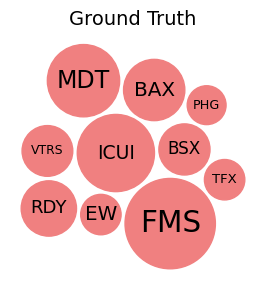

In [ ]:
seed, sp, fs_scale, fs_title, c = 105, .8, 8, 14, 'lightcoral'
fig, ax = plt.subplots(figsize = (3, 3), subplot_kw = {'aspect' : 'equal'})
hubs_gt = pd.read_csv(os.path.join(datadir, 'refNetwork.csv')).groupby('Gene1').size()
hubs_gt = hubs_gt.sample(frac = 1, random_state = seed)
bubble_chart = BubbleChart(area = hubs_gt.values, bubble_spacing = sp)
bubble_chart.collapse().plot(ax, hubs_gt.index.values, c, fs_scale)
ax.set_title('Ground Truth', fontsize = fs_title)
ax.axis(False)
ax.relim()
ax.autoscale_view()
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'hubs-ground-truth.svg'), bbox_inches = 'tight', dpi = 600)

## Plot DELAY network

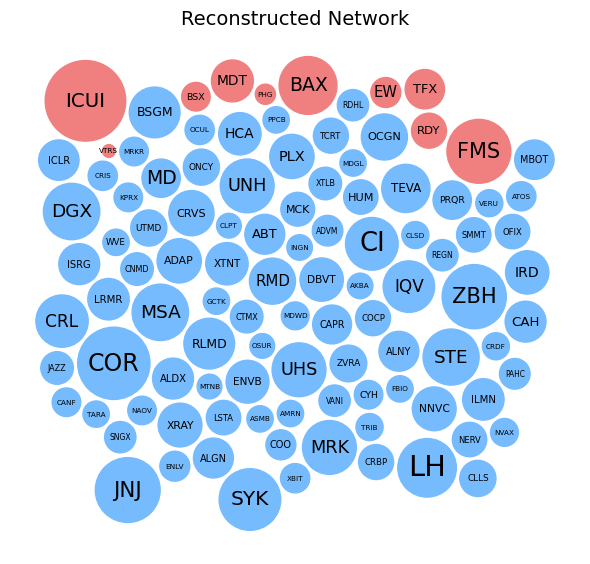

In [ ]:
seed, min_deg, fs_min, c2 = 107, 15, 5.25, 'xkcd:sky blue'
fig, ax = plt.subplots(figsize = (6, 6), subplot_kw = {'aspect' : 'equal'})
hubs_pred = pd.read_csv(os.path.join(datadir, 'hubsTop465.csv'), index_col = 0).Outdegree
hubs_pred.index = hubs_pred.index.str.upper()
hubs_pred_gt = hubs_pred.loc[hubs_gt.index].copy()
hubs_pred.drop(hubs_gt.index, inplace = True)
hubs_pred = hubs_pred.loc[hubs_pred >= min_deg].sample(frac = 1, random_state = seed)
hubs_pred = pd.concat((hubs_pred, hubs_pred_gt))
c_hubs = [c if ix in hubs_gt.index else c2 for ix in hubs_pred.index]
bubble_chart = BubbleChart(area = hubs_pred.values, bubble_spacing = sp)
bubble_chart.collapse().plot(ax, hubs_pred.index.values, c_hubs, fs_scale, fs_min)
ax.set_title('Reconstructed Network', fontsize = fs_title)
ax.axis(False)
ax.relim()
ax.autoscale_view()
plt.tight_layout()
plt.savefig(os.path.join(outdir, 'hubs-DELAY-network.svg'), bbox_inches = 'tight', dpi = 600)